# Tableau Homework - Citi Bike Analytics

Since 2013, the Citi Bike Program has implemented a robust infrastructure for collecting data on the program's utilization. Through the team's efforts, each month bike data is collected, organized, and made public on the Citi Bike Data [webpage](https://www.citibikenyc.com/system-data)

Task
Your task in this assignment is to aggregate the data found in the Citi Bike Trip History Logs and find two unexpected phenomena.

Design 2-5 visualizations for each discovered phenomena (4-10 total). You may work with a timespan of your choosing. Optionally, you may merge multiple datasets from different periods.

### Import Dependencies

In [1]:
import os
import pandas as pd

### Import and clean the data

In [2]:
directory = os.path.join("data","NY-2018-2020")

In [3]:
# Get list of files on the directory
files_list = [];
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        files_list.append(os.path.join(filename))

    else:
        continue

In [4]:
df_merged = pd.DataFrame({'A' : []})

In [5]:
n = 0
for file in files_list:
    if n == 0:
        filepath = os.path.join(directory,file)
        df_merged = pd.read_csv(filepath)
    else:
        filepath = os.path.join(directory,file)
        df = pd.read_csv(filepath)
        df_merged = pd.merge(df, df_merged, how='outer')
    
    n += 1

In [6]:
df_merged

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,521,2020-11-01 00:00:07.0150,2020-11-01 00:08:48.3010,3467,W Broadway & Spring St,40.724947,-74.001659,350,Clinton St & Grand St,40.715595,-73.987030,40405,Subscriber,1989,1
1,492,2020-11-01 00:00:10.8080,2020-11-01 00:08:23.3170,3557,40 Ave & 9 St,40.757420,-73.945133,3557,40 Ave & 9 St,40.757420,-73.945133,46504,Subscriber,1970,2
2,1979,2020-11-01 00:00:14.7040,2020-11-01 00:33:14.1640,3085,Roebling St & N 4 St,40.714690,-73.957390,3854,Morgan Ave & Maspeth Ave,40.716657,-73.936370,37452,Subscriber,1989,2
3,2382,2020-11-01 00:00:14.7070,2020-11-01 00:39:57.0030,3783,Cliff St & Fulton St,40.708380,-74.004950,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,40417,Subscriber,1981,1
4,166,2020-11-01 00:00:15.9690,2020-11-01 00:03:02.8980,422,W 59 St & 10 Ave,40.770513,-73.988038,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,35776,Subscriber,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985568,1120,2020-10-31 23:59:48.4470,2020-11-01 00:18:29.3280,471,Grand St & Havemeyer St,40.712868,-73.956981,3764,Bushwick Ave & McKibbin St,40.705517,-73.939360,35356,Customer,1996,1
3985569,859,2020-10-31 23:59:49.3770,2020-11-01 00:14:09.1920,4005,St. Nicholas Terrace & Convent Ave,40.821294,-73.947868,3960,Hamilton Pl & W 140 St,40.822756,-73.951346,48322,Customer,1999,1
3985570,546,2020-10-31 23:59:52.1040,2020-11-01 00:08:59.0710,4010,W 145 St & Amsterdam Ave,40.825244,-73.947257,4057,Amsterdam Ave & W 167 St,40.839443,-73.937044,44589,Subscriber,1976,1
3985571,748,2020-10-31 23:59:53.0290,2020-11-01 00:12:21.7830,3783,Cliff St & Fulton St,40.708380,-74.004950,432,E 7 St & Avenue A,40.726218,-73.983799,48511,Subscriber,1997,2


In [7]:
df_merged.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [8]:
df_merged.isnull().values.any()

False

In [9]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df_merged['starttime'])  
    
bool_series.describe()

count     3985573
unique          1
top         False
freq      3985573
Name: starttime, dtype: object

### Analytics

* How many trips have been recorded total during the chosen period?

In [10]:
# How many trips have been recorded total during the chosen period?
total_trips = df_merged['tripduration'].count()
print(f"How many trips have been recorded total during the chosen period? \nR:{total_trips}")

How many trips have been recorded total during the chosen period? 
R:3985573


<hr style="border-top: 3px solid gray;">

* By what percentage has total ridership grown?

In [11]:
df_merged.index = pd.to_datetime(df_merged['starttime'],format='%Y-%m-%d')
df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year])
# df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year, df_merged.index.month])

In [12]:
df_grouped_year = df_grouped_starttime.count()
df_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2020,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573,3985573


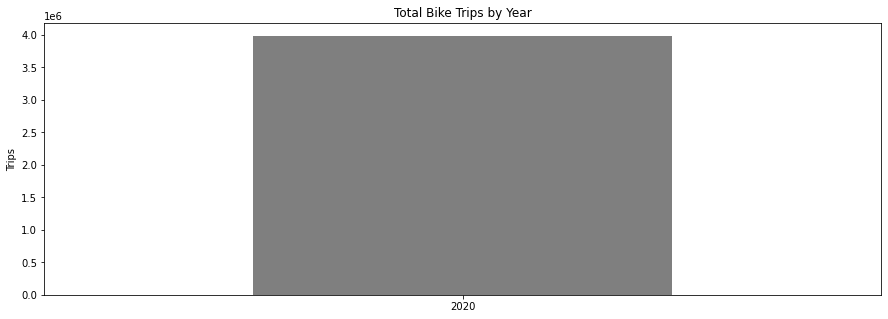

In [13]:
ax = df_grouped_year['tripduration'].plot(kind="bar",color="black", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Total Bike Trips by Year");

In [14]:
growth_2019 = df_grouped_year['tripduration'].iloc[1] / df_grouped_year['tripduration'].iloc[0]
growth_2020 = df_grouped_year['tripduration'].iloc[2] / df_grouped_year['tripduration'].iloc[1]

IndexError: single positional indexer is out-of-bounds

In [ ]:
print(f"Growth 2019: {round(growth_2019*100)}%")
print(f"Growth 2020*: {round(growth_2020*100)}%")
print("\n* for 2020 still missing December")

<hr style="border-top: 3px solid gray;">

* How has the proportion of short-term customers and annual subscribers changed?

In [15]:
df_Subscriber = df_merged.loc[df_merged['usertype'] == 'Subscriber']
df_Subscriber_grouped_year = df_Subscriber.groupby(by=[ df_Subscriber.index.year]).count()
df_Subscriber_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2020,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523,3064523


<AxesSubplot:xlabel='starttime'>

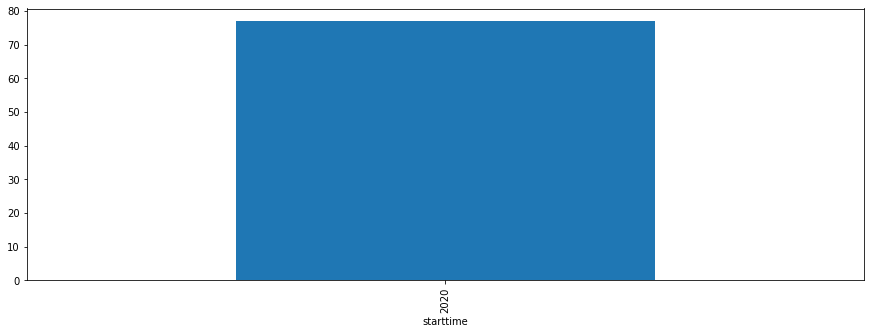

In [16]:
subscriber_to_total = 100*df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration']
subscriber_to_total.plot(kind='bar',figsize=(15, 5))

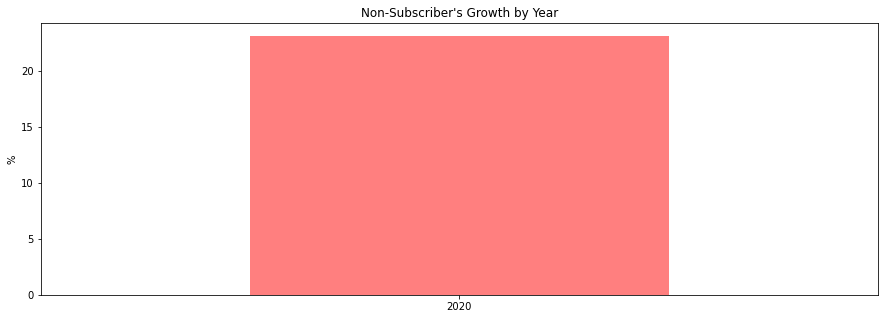

In [17]:
customer_to_total = 100*(1-df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration'])
ax = customer_to_total.plot(kind='bar',color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("%");
ax.set_title("Non-Subscriber's Growth by Year");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during summer months?

In [ ]:
# summer (June, July, August)
df_resampled_year = df_merged['starttime'].resample('Y')
df_resampled_year


In [ ]:
df_resampled_year.count()

In [ ]:
df_resampled_by_hour = df_merged['starttime'].resample('H').count()

In [ ]:
df_resampled_by_hour

In [ ]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-06-01")]

In [ ]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour_summer_2018.loc[(df_resampled_by_hour_summer_2018.index < "2018-09-01")]

In [ ]:
df_summer_2018 = pd.DataFrame(df_resampled_by_hour_summer_2018.resample('H').sum())

In [ ]:
df_summer_2018.plot()

In [ ]:
ax = df_summer_2018.groupby(by=[ df_summer_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2018)");

In [ ]:
df_resampled_by_hour_summer_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-06-01")]
df_resampled_by_hour_summer_2019 = df_resampled_by_hour_summer_2019.loc[(df_resampled_by_hour_summer_2019.index < "2019-09-01")]
df_summer_2019 = pd.DataFrame(df_resampled_by_hour_summer_2019.resample('H').sum())
ax = df_summer_2019.groupby(by=[ df_summer_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2019)");

In [ ]:
df_resampled_by_hour_summer_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-06-01")]
df_resampled_by_hour_summer_2020 = df_resampled_by_hour_summer_2020.loc[(df_resampled_by_hour_summer_2020.index < "2020-09-01")]
df_summer_2020 = pd.DataFrame(df_resampled_by_hour_summer_2020.resample('H').sum())
ax = df_summer_2020.groupby(by=[ df_summer_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2020)");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during winter months?

In [ ]:
df_resampled_by_hour_winter_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-01-01")]
df_resampled_by_hour_winter_2018 = df_resampled_by_hour_winter_2018.loc[(df_resampled_by_hour_winter_2018.index < "2018-03-01")]
df_winter_2018 = pd.DataFrame(df_resampled_by_hour_winter_2018.resample('H').sum())
ax = df_winter_2018.groupby(by=[ df_winter_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2018)");

In [ ]:
df_resampled_by_hour_winter_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-01-01")]
df_resampled_by_hour_winter_2019 = df_resampled_by_hour_winter_2019.loc[(df_resampled_by_hour_winter_2019.index < "2019-03-01")]
df_winter_2019 = pd.DataFrame(df_resampled_by_hour_winter_2019.resample('H').sum())
ax = df_winter_2019.groupby(by=[ df_winter_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2019)");

In [ ]:
df_resampled_by_hour_winter_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-01-01")]
df_resampled_by_hour_winter_2020 = df_resampled_by_hour_winter_2020.loc[(df_resampled_by_hour_winter_2020.index < "2020-03-01")]
df_winter_2020 = pd.DataFrame(df_resampled_by_hour_winter_2020.resample('H').sum())
ax = df_winter_2020.groupby(by=[ df_winter_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2020)");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for starting a journey? (Based on data, why do you hypothesize these are the top locations?)

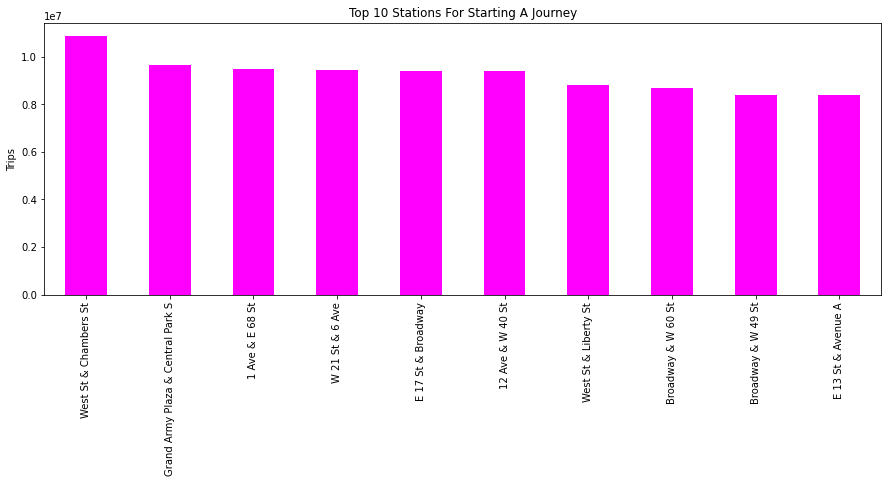

In [18]:
top10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_start_stations['tripduration'].plot(kind="bar", color="fuchsia", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for ending a journey? (Based on data, why?)

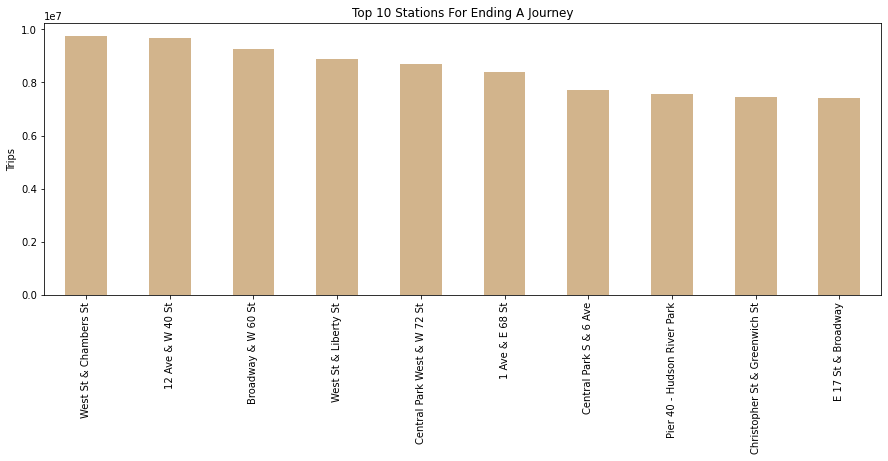

In [19]:
top10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=False).head(10)
ax = top10_ending_stations['tripduration'].plot(kind="bar", color="tan", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for starting a journey? (Based on data, why?)

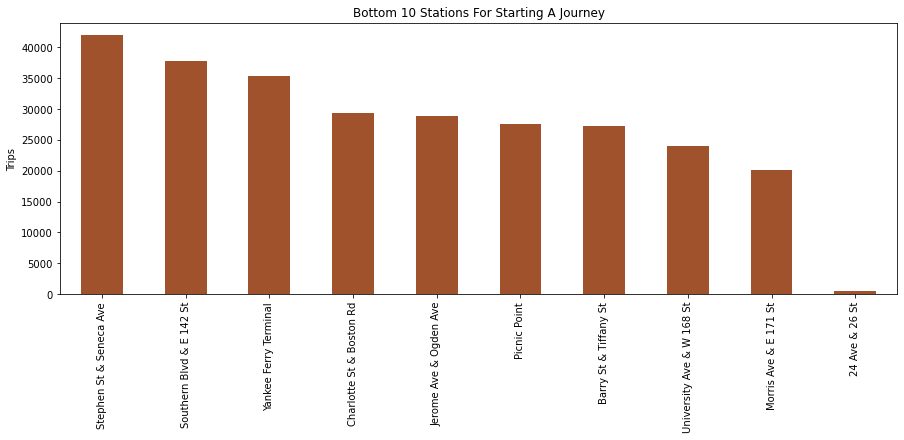

In [20]:
bottom10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_start_stations['tripduration'].plot(kind="bar", color="sienna", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for ending a journey (Based on data, why?)

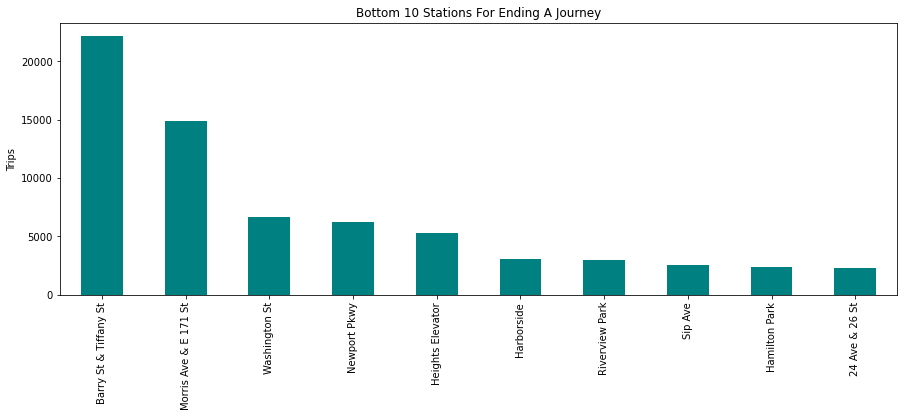

In [21]:
bottom10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").sum().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_ending_stations['tripduration'].plot(kind="bar", color="teal", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what is the gender breakdown of active participants (Male v. Female)?

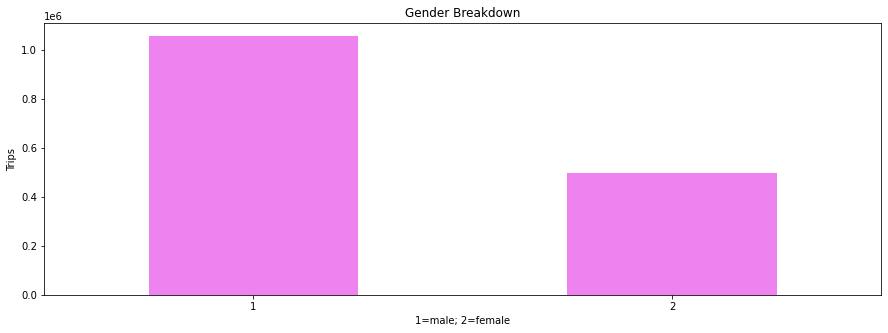

In [22]:
gender_breakdown = df_merged.loc[(df_merged.index >= "2020-11-01") & (df_merged.gender != 0)].groupby("gender")
ax = gender_breakdown['tripduration'].count().plot(kind="bar", rot=0,color="violet", alpha=1,figsize=(15, 5))
ax.set_xlabel("1=male; 2=female");
ax.set_ylabel("Trips");
ax.set_title("Gender Breakdown");

<hr style="border-top: 3px solid gray;">

* How effective has gender outreach been in increasing female ridership over the timespan?

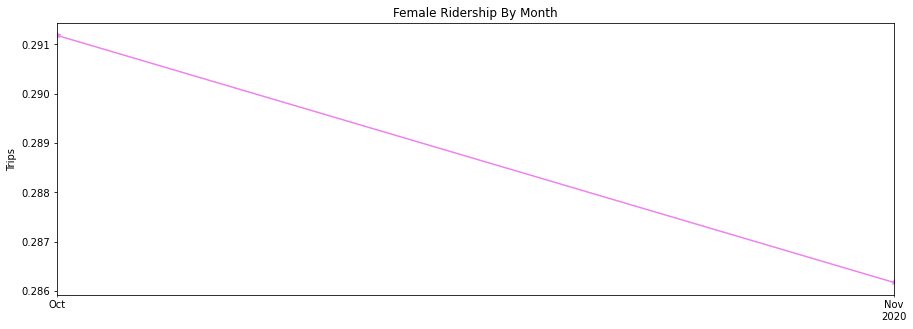

In [23]:
female_ridership_by_month = df_merged['tripduration'].loc[(df_merged.gender == 2)].resample("M").count() / df_merged['tripduration'].resample("M").count()
ax = female_ridership_by_month.plot(color="violet",marker='*', alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Female Ridership By Month");

<hr style="border-top: 3px solid gray;">

* How does the average trip duration change by age?

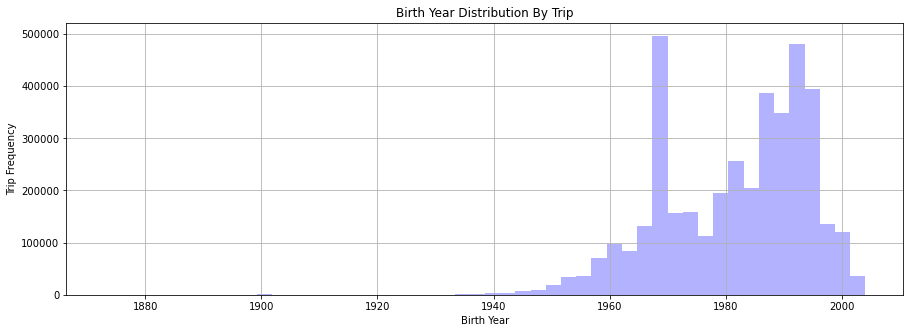

In [24]:
ax = df_merged['birth year'].hist(bins=50,color="b", alpha=.3,figsize=(15, 5))
ax.set_xlabel("Birth Year");
ax.set_ylabel("Trip Frequency");
ax.set_title("Birth Year Distribution By Trip");

In [25]:
df_grouped_age = df_merged.groupby("birth year")

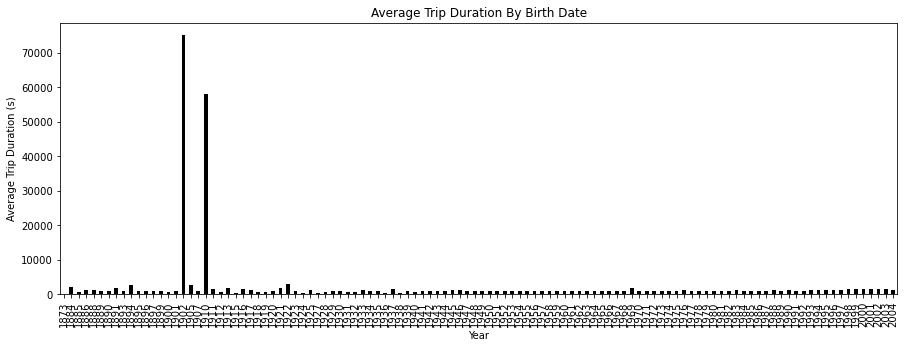

In [26]:
ax = df_grouped_age['tripduration'].mean().plot(kind="bar",color="k", alpha=1,figsize=(15, 5))
ax.set_xlabel("Year");
ax.set_ylabel("Average Trip Duration (s)");
ax.set_title("Average Trip Duration By Birth Date");

In [27]:
df_grouped_age_usertype = df_merged.groupby(["birth year","usertype"]).count()

In [28]:
df_grouped_age_usertype

tripduration  starttime  stoptime  start station id  \
birth year usertype                                                          
1873       Subscriber             2          2         2                 2   
1884       Subscriber             3          3         3                 3   
1885       Subscriber            52         52        52                52   
1886       Subscriber            24         24        24                24   
1888       Subscriber           131        131       131               131   
...                             ...        ...       ...               ...   
2002       Subscriber         13150      13150     13150             13150   
2003       Customer            3207       3207      3207              3207   
           Subscriber          5778       5778      5778              5778   
2004       Customer            1408       1408      1408              1408   
           Subscriber          1719       1719      1719              1719   

                       start station name  start station latitude  \
birth year usertype                                                 
1873       Subscriber                   2                       2   
1884       Subscriber                   3                       3   
1885       Subscriber                  52                      52   
1886       Subscriber                  24                      24   
1888       Subscriber                 131                     131   
...                                   ...                     ...   
2002       Subscriber               13150                   13150   
2003       Customer                  3207                    3207   
           Subscriber                5778                    5778   
2004       Customer                  1408                    1408   
           Subscriber                1719                    1719   

                       start station longitude  end station id  \
birth year usertype                                              
1873       Subscriber                        2               2   
1884       Subscriber                        3               3   
1885       Subscriber                       52              52   
1886       Subscriber                       24              24   
1888       Subscriber                      131             131   
...                                        ...             ...   
2002       Subscriber                    13150           13150   
2003       Customer                       3207            3207   
           Subscriber                     5778            5778   
2004       Customer                       1408            1408   
           Subscriber                     1719            1719   

                       end station name  end station latitude  \
birth year usertype                                             
1873       Subscriber                 2                     2   
1884       Subscriber                 3                     3   
1885       Subscriber                52                    52   
1886       Subscriber                24                    24   
1888       Subscriber               131                   131   
...                                 ...                   ...   
2002       Subscriber             13150                 13150   
2003       Customer                3207                  3207   
           Subscriber              5778                  5778   
2004       Customer                1408                  1408   
           Subscriber              1719                  1719   

                       end station longitude  bikeid  gender  
birth year usertype                                           
1873       Subscriber                      2       2       2  
1884       Subscriber                      3       3       3  
1885       Subscriber                     52      52      52  
1886       Subscriber                     24      24      24  
1888       Subscriber      

<hr style="border-top: 3px solid gray;">

* What is the average distance in miles that a bike is ridden?

In [29]:
from geopy.distance import geodesic

origin = (df_merged['start station latitude'].iloc[0], df_merged['start station longitude'].iloc[0])
dist = (df_merged['end station latitude'].iloc[0], df_merged['end station longitude'].iloc[0])
print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")

Distance is 1.0 miles


In [ ]:
list_distances = []
for index in range(len(df_merged.index)):
    origin = (df_merged['start station latitude'].iloc[index], df_merged['start station longitude'].iloc[index])
    dist = (df_merged['end station latitude'].iloc[index], df_merged['end station longitude'].iloc[index])
#     print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")
    list_distances.append(round(100*geodesic(origin, dist).miles)/100)

In [ ]:
average_distance = sum(list_distances)/len(list_distances)

In [ ]:
average_distance

In [ ]:
pd.DataFrame(list_distances).hist()

<hr style="border-top: 3px solid gray;">

* Which bikes (by ID) are most likely due for repair or inspection in the timespan?

In [ ]:
df_groupby = df_merged.groupby("bikeid")

In [ ]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=False).head(15).plot(kind="bar", color="y", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Top 10 Bikes By Total Trip Time");

In [ ]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=True).head(15).sort_values(ascending=False).plot(kind="bar", color="g", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Bottom 10 Bikes By Total Trip Time");

<hr style="border-top: 3px solid gray;">

* How variable is the utilization by bike ID?

In [ ]:
ax = df_groupby['tripduration'].count().plot(color="k", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip");
ax.set_title("Total Trips by Bike");

In [ ]:
ax = df_groupby['tripduration'].sum().plot(color="r", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Total Trip Duration by Bike");

<hr style="border-top: 3px solid gray;">